In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip -q "drive/My Drive/Colab Notebooks/train.zip"
!ls "drive/My Drive/Colab Notebooks"

'Copy of Untitled2.ipynb'   Untitled1.ipynb	       Untitled2_res.ipynb
 diabetic_retinopathy	    Untitled2.ipynb
 train.zip		   'Untitled2_res (1).ipynb'


In [0]:
import shutil, os, glob
 
def moveAllFilesinDir(srcDir, dstDir):
    # Check if both the are directories
    if os.path.isdir(srcDir) and os.path.isdir(dstDir) :
        # Iterate over all the files in source directory
        for filePath in glob.glob(srcDir + '/*'):
            # Move each file to destination Directory
            shutil.move(filePath, dstDir);
    else:
        print("srcDir & dstDir should be Directories")


In [0]:
!mkdir tmp

In [0]:
!mkdir tmp/train
!mkdir tmp/train/0
!mkdir tmp/train/1
!mkdir tmp/train/2
!mkdir tmp/train/3
!mkdir tmp/train/4

In [0]:
moveAllFilesinDir('0', 'tmp/train/0')
moveAllFilesinDir('1', 'tmp/train/1')
moveAllFilesinDir('2', 'tmp/train/2')
moveAllFilesinDir('3', 'tmp/train/3')
moveAllFilesinDir('4', 'tmp/train/4')

In [7]:
!ls tmp/train/0 | wc -l
!ls tmp/train/1 | wc -l
!ls tmp/train/2 | wc -l
!ls tmp/train/3 | wc -l
!ls tmp/train/4 | wc -l

8810
4675
5042
3323
2710


In [0]:
!mkdir tmp/val
!mkdir tmp/val/0
!mkdir tmp/val/1
!mkdir tmp/val/2
!mkdir tmp/val/3
!mkdir tmp/val/4

In [0]:
!mkdir tmp/test
!mkdir tmp/test/0
!mkdir tmp/test/1
!mkdir tmp/test/2
!mkdir tmp/test/3
!mkdir tmp/test/4

In [0]:
BASE_DIR = "tmp/train/"
NEW_DIR= "tmp/val/"

list_dir =  os.listdir(BASE_DIR)

import random

for tdir in list_dir:
    list_images = os.listdir(BASE_DIR+tdir)
    to_val = random.sample(list_images, len(list_images)//5)
    for images in to_val:
        os.rename(BASE_DIR + str(tdir) + "/"+ images, NEW_DIR + str(tdir) + "/" + images )

In [0]:
BASE_DIR = "tmp/val/"
NEW_DIR= "tmp/test/"

list_dir =  os.listdir(BASE_DIR)

import random

for tdir in list_dir:
    list_images = os.listdir(BASE_DIR+tdir)
    to_val = random.sample(list_images, len(list_images)//2)
    for images in to_val:
        os.rename(BASE_DIR + str(tdir) + "/"+ images, NEW_DIR + str(tdir) + "/" + images )

In [12]:
print('Train Images')
!ls tmp/train/0 | wc -l
!ls tmp/train/1 | wc -l
!ls tmp/train/2 | wc -l
!ls tmp/train/3 | wc -l
!ls tmp/train/4 | wc -l

print('Val Images')
!ls tmp/val/0 | wc -l
!ls tmp/val/1 | wc -l
!ls tmp/val/2 | wc -l
!ls tmp/val/3 | wc -l
!ls tmp/val/4 | wc -l

print('Test Images')
!ls tmp/test/0 | wc -l
!ls tmp/test/1 | wc -l
!ls tmp/test/2 | wc -l
!ls tmp/test/3 | wc -l
!ls tmp/test/4 | wc -l


Train Images
7048
3740
4034
2659
2168
Val Images
881
468
504
332
271
Test Images
881
467
504
332
271


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
# try:
#   # %tensorflow_version only exists in Colab.
#   !pip install --upgrade tf-nightly
# except Exception:
#   pass
import tensorflow as tf

In [37]:
!pip install --upgrade tensorflow-gpu==2
import tensorflow as tf

Requirement already up-to-date: tensorflow-gpu==2 in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [38]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.0.0'

In [39]:
list_ds = tf.data.Dataset.list_files(str('tmp/train/*/*'))
list_ds_val = tf.data.Dataset.list_files(str('tmp/val/*/*'))
list_ds_test = tf.data.Dataset.list_files(str('tmp/test/*/*'))

for f in list_ds.take(5):
  print(f.numpy())
for f in list_ds_val.take(5):
  print(f.numpy())

b'tmp/train/1/22916_right.jpeg'
b'tmp/train/2/41514_right.jpeg'
b'tmp/train/1/301_right.jpeg'
b'tmp/train/1/230402_right.jpeg'
b'tmp/train/3/113716_left.jpeg'
b'tmp/val/0/10154_left.jpeg'
b'tmp/val/1/40757_left.jpeg'
b'tmp/val/1/234567_left.jpeg'
b'tmp/val/0/4569_left.jpeg'
b'tmp/val/0/34138_right.jpeg'


In [0]:
import pathlib
data_dir = pathlib.Path('tmp/train')
data_dir_val = pathlib.Path('tmp/val') 
data_dir_test = pathlib.Path('tmp/test') 

In [41]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
print(CLASS_NAMES)

19649
['4' '2' '0' '3' '1']


In [0]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, '/')
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [0]:
BATCH_SIZE = 32
IMG_HEIGHT = 256
IMG_WIDTH = 256
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds = list_ds.map(process_path, num_parallel_calls=32)
labeled_ds_val = list_ds_val.map(process_path, num_parallel_calls=32)
labeled_ds_test = list_ds_test.map(process_path, num_parallel_calls=32)

In [44]:
for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (256, 256, 3)
Label:  [False False  True False False]


In [0]:
IMG_SIZE = 256 # All images will be resized to 256*256

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [0]:
raw_train = labeled_ds
raw_validation = labeled_ds_val
raw_test = labeled_ds_test

In [0]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [0]:
BATCH_SIZE = 8
SHUFFLE_BUFFER_SIZE = 1000

In [0]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [50]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([8, 256, 256, 3])

In [0]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
# Create the base model from the pre-trained model 
base_model = tf.compat.v2.keras.applications.resnet.ResNet50(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

In [52]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(8, 8, 8, 2048)


In [0]:
base_model.trainable = False

In [54]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [55]:
global_average_layer = tf.keras.layers.GlobalMaxPooling2D(data_format=None)
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(8, 2048)


In [56]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(8, 1)


In [0]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [72]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 8, 8, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
SPLIT_WEIGHTS = (8, 1, 1)

In [0]:
num_train = 19649
num_val= 2456
num_test=2455

In [0]:
initial_epochs = 3
steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = 20

#loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)
# print("initial loss: {:.2f}".format(loss0))
# print("initial accuracy: {:.2f}".format(accuracy0))

In [70]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches,
                    shuffle=True)

Epoch 1/3
2457/2457 [==============================] - 320s 130ms/step - loss: 1.1921e-07 - accuracy: 0.6099 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/3
2457/2457 [==============================] - 315s 128ms/step - loss: 1.1921e-07 - accuracy: 0.6110 - val_loss: 1.1921e-07 - val_accuracy: 0.2000
Epoch 3/3
2457/2457 [==============================] - 314s 128ms/step - loss: 1.1921e-07 - accuracy: 0.6124 - val_loss: 1.1921e-07 - val_accuracy: 0.2000


Text(0.5, 1.0, 'Training and Validation Accuracy')

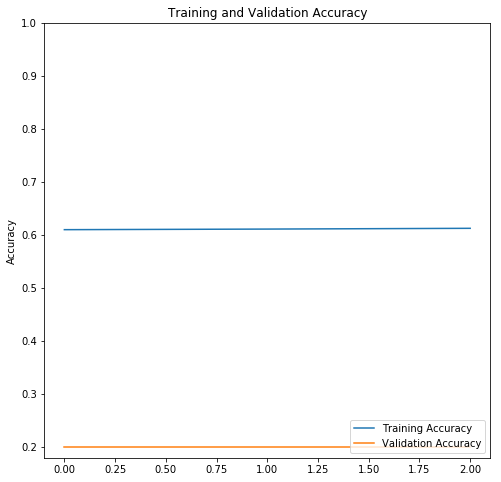

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


In [77]:
model.evaluate(test_batches, steps=50)


50/50 [==============================] - 6s 113ms/step - loss: 1.1921e-07 - accuracy: 0.2000


[1.1920930376163597e-07, 0.1999999]